In [65]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data= "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
pymaceuticals_df=pd.merge(mouse_drug,clinical_trial, on=["Mouse ID"], how="outer")

len_time=len("Timepoint")


# Display the data table for preview

pymaceuticals_df.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_table=pymaceuticals_df.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)']

tumor_mean=tumor_table.mean()

# Convert to DataFrame
tumor_mean_df=pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df.reset_index(inplace=True)

In [5]:
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=tumor_table.sem()

# Convert to DataFrame
tumor_sem_df=pd.DataFrame(tumor_sem)

# Preview DataFrame
tumor_sem_df.reset_index(inplace=True)
tumor_sem_df.head()




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [69]:
# Minor Data Munging to Re-Format the Data Frames

#collect the drug information and apply unique function
drug=pymaceuticals_df["Drug"].unique()
#print(drug)

#create the dataframe
drug_df=pd.DataFrame(drug)
print(drug_df)




#for row in drug_df:
data_munging_1=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Capomulin"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_2=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Ceftamin"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_3=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Infubinol"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_4=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Ketapril"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_5=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Naftisol"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_6=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Placebo"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_7=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Propriva"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_8=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Ramicane"].groupby("Timepoint").mean()['Tumor Volume (mm3)']
data_munging_9=pymaceuticals_df.loc[pymaceuticals_df['Drug']=="Zoniferol"].groupby("Timepoint").mean()['Tumor Volume (mm3)']



#data_munging_df=pd.DataFrame()

# Preview that Reformatting worked
df_mung=pd.DataFrame(data={"Capomulin":data_munging_1,"Ceftamin":data_munging_2,"Infubinol":data_munging_3,"Ketapril":data_munging_4,
                           "Naftisol":data_munging_5,"Placebo":data_munging_6,"Propriva":data_munging_7,
                           "Ramicane":data_munging_8,"Zoniferol":data_munging_9})
df_mung.head()

           0
0   Stelasyn
1   Propriva
2   Naftisol
3   Ketapril
4  Capomulin
5  Infubinol
6   Ceftamin
7  Zoniferol
8   Ramicane
9    Placebo


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Zoniferol
Timepoint,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.170334


In [74]:
drug=pymaceuticals_df["Drug"].unique()
unique_Df=pymaceuticals_df.drop_duplicates()
pivot =pymaceuticals_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot

ValueError: Index contains duplicate entries, cannot reshape

In [45]:
# ...for name in drug_df:
    # Loop through looking for the video
for row in drug:
    if row[1] == pymaceuticals_df["Drug"]:
       print(pymaceuticals_df["Tumor Volume (mm3)"])

            # Set variable to confirm we have found the video
       found = True

    # If the video is never found, alert the user
    #if found == False:
       # print("We don't seem to have what you are looking for!")...#







ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure



ValueError: err must be [ scalar | N, Nx1 or 2xN array-like ]

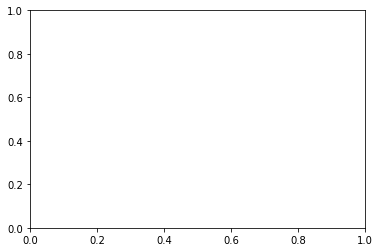

In [68]:
x_axis=len_time
y_axis=df_mung["Ceftamin"]
#fahrenheit, = plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=1, label="Ceftamin")
#celcius, = plt.plot(x_axis, y_axis, marker="s", color="Red", linewidth=1, label="Celcius")
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, x_axis),x_axis , yerr=y_axis, fmt="o", color="b",
            alpha=0.5, label="Meta")

ax.set_xlim(-0.5, x_axis)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()

In [59]:
# Plot sample means with error bars
x_axis=tumor_sem_df["Timepoint"]
y_axis=tumor_sem_df[["Capomulin","Ceftamin"]]
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(x_axis)),x_axis , yerr=y_axis, fmt="o", color="b",
            alpha=0.5, label="Meta")

ax.set_xlim(-0.5, len(x_axis))

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()

KeyError: "None of [Index(['Capomulin', 'Ceftamin'], dtype='object')] are in the [columns]"

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_treat=pymaceuticals_df.groupby(["Drug","Timepoint"])['Metastatic Sites']
meta_mean=meta_treat.mean()

# Convert to DataFrame

meta_df=pd.DataFrame(meta_mean)


# Preview DataFrame
meta_df.reset_index(inplace=True)
meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = meta_treat.sem()

# Convert to DataFrame
meta_sem_df=pd.DataFrame(meta_sem)

# Preview DataFrame
meta_sem_df.reset_index(inplace=True)
meta_sem_df.head()





,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [81]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data=pymaceuticals_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_df=pd.DataFrame(survival_data)
# Preview DataFrame
survival_df.reset_index(inplace=True)
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()